In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics, preprocessing
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, train_test_split

pd.set_option('display.max_columns', 500)

# 1. Data

In [7]:
data = pd.read_csv("../CDE_Final_Data.csv", index_col = 0)
data.head()

,K12_PCT_MINORITY,K12_PCT_ENGLISH_LEARNERS,K12_PCT_IEP_STUDENTS,ONLINE_YN,CHARTER_YN,ACH,GRO,PWR,RATING_PRELIMINARY,PCT_PTS_EARN_WEIGHTED,School Year,SchoolCodeYear,District Code,District Name,School Code,School Name,DistrictCodeYear,Truancy Rate,American Indian or Alaskan Native Female,American Indian or Alaskan Native Male,Asian Female,Asian male,Black or African American Female,Black or African American Male,Hispanic or Latino Female,Hispanic or Latino Male,White Female,White Male,Native Hawaiian or Other Pacific Islander Female,Native Hawaiian or Other Pacific Islander Male,Two or More Races Female,Two or More Races Male,PK-12 Total,% FREE AND REDUCED,Average Salary_Teacher,Turnover_Adminstrators,Turnover_Principals,Turnover_Total Staff,Total Funding,District Total Pupil Count,Funding Per Pupil,Total Student Mobility Rate,EMH_TYPE_E,EMH_TYPE_EM,EMH_TYPE_EMH,EMH_TYPE_H,EMH_TYPE_M,EMH_TYPE_MH,District Setting_Denver Metro,District Setting_Outlying City,District Setting_Outlying Town,District Setting_Remote,District Setting_Urban-Suburban,Rural Classification_Not Rural,Rural Classification_Rural,Rural Classification_Small Rural,Rating (Simple),Previous Year Rating,American Indian or Alaskan Native,Asian,Black or African American,Hispanic or Latino,White,Native Hawaiian or Other Pacific Islander,Female
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.977,0.712,0.110,0,0,0.327,0.615,0.417,Improvement Plan: Low Participation^,0.469,2015/2016,00102015/2016,880,DENVER COUNTY 1,10,ABRAHAM LINCOLN HIGH SCHOOL,08802015/2016,0.121309,0.006461,0.004307,0.014358,0.018665,0.012922,0.012204,0.413496,0.491027,0.010768,0.012204,0.000000,0.000000,0.000000,0.003589,1393,0.917444,50247.36260,0.394231,0.185864,0.278196,651323954.8,85584.6,7610.290000,0.177,0,0,0,1,0,0,1,0,0,0,0,1,0,0,Improvement Plan,NaN,0.010768,0.033022,0.025126,0.904523,0.022972,0.000000,0.458004
1,0.172,0.015,0.030,0,1,0.838,0.573,NaN,Performance Plan: Low Participation^,0.679,2015/2016,00112015/2016,900,DOUGLAS COUNTY RE 1,11,ACADEMY CHARTER SCHOOL,09002015/2016,0.015784,0.000000,0.000000,0.008242,0.006868,0.004121,0.002747,0.064560,0.053571,0.425824,0.402473,0.000000,0.000000,0.015110,0.016484,728,0.065934,51274.18469,0.320988,0.233333,0.246502,445151334.0,63158.5,7048.160000,0.131,0,1,0,0,0,0,1,0,0,0,0,1,0,0,Performance Plan,NaN,0.000000,0.015110,0.006868,0.118132,0.828297,0.000000,0.517857
2,0.442,0.162,0.118,0,0,0.662,0.598,NaN,Improvement Plan: Decreased due to Participation^,0.624,2015/2016,00122015/2016,900,DOUGLAS COUNTY RE 1,12,ACRES GREEN ELEMENTARY SCHOOL,09002015/2016,0.009454,0.000000,0.000000,0.086592,0.107542,0.013966,0.008380,0.085196,0.069832,0.269553,0.282123,0.000000,0.001397,0.034916,0.040503,716,0.230303,51274.18469,0.320988,0.233333,0.246502,445151334.0,63158.5,7048.160000,0.131,1,0,0,0,0,0,1,0,0,0,0,1,0,0,Improvement Plan,NaN,0.000000,0.194134,0.022346,0.155028,0.551676,0.001397,0.490223
3,0.460,0.123,0.117,0,0,0.470,0.633,NaN,Performance Plan,0.568,2015/2016,00142015/2016,20,ADAMS 12 FIVE STAR SCHOOLS,14,GLACIER PEAK ELEMENTARY SCHOOL,00202015/2016,0.004486,0.000000,0.003899,0.019493,0.017544,0.003899,0.007797,0.152047,0.204678,0.247563,0.292398,0.003899,0.000000,0.027290,0.019493,513,0.298246,57561.37523,0.183333,0.128713,0.170114,267420363.2,37428.3,7144.870000,0.140,1,0,0,0,0,0,1,0,0,0,0,1,0,0,Performance Plan,NaN,0.003899,0.037037,0.011696,0.356725,0.539961,0.003899,0.454191
4,0.388,0.117,0.057,0,1,0.740,0.635,0.750,Performance Plan: Low Participation^,0.701,2015/2016,00152015/2016,8001,CHARTER SCHOOL INSTITUTE,15,ACADEMY OF CHARTER SCHOOLS,80012015/2016,0.013664,0.002749,0.002199,0.038483,0.038483,0.005498,0.005498,0.127543,0.129742,0.311160,0.301264,0.000000,0.001649,0.015943,0.019791,1819,0.179219,39656.13143,0.243902,0.181818,0.326256,103187404.8,14412.2,7159.726122,0.196,0,0,1,0,0,0,0,0,0,0,1,1,0,0,Performance Plan,NaN,0.004948,0.076965,0.010995,0.257284,0.612424,0.001649,0.501374


In [8]:
X = data[['K12_PCT_MINORITY','Total Funding','District Total Pupil Count', 'Total Student Mobility Rate', "Rural Classification_Rural", 'Rural Classification_Not Rural',"Rural Classification_Small Rural", "K12_PCT_ENGLISH_LEARNERS","K12_PCT_IEP_STUDENTS","Truancy Rate", 
                "Female", "American Indian or Alaskan Native", "Asian", "Black or African American", "Hispanic or Latino", "White", "Native Hawaiian or Other Pacific Islander",
                "PK-12 Total", "% FREE AND REDUCED", "Average Salary_Teacher", "Turnover_Adminstrators", "Turnover_Principals", "Turnover_Total Staff", "ONLINE_YN", "CHARTER_YN", "EMH_TYPE_E", "EMH_TYPE_EM", "EMH_TYPE_EMH", "EMH_TYPE_H", "EMH_TYPE_M","EMH_TYPE_MH","District Setting_Denver Metro",'District Setting_Outlying City',"District Setting_Outlying Town","District Setting_Remote","District Setting_Urban-Suburban"]]
y = data["Rating (Simple)"]
y_log_reg = y.replace('Performance Plan',1).replace('Improvement Plan',2).replace('Priority Improvement Plan',3).replace('Turnaround Plan',4)
print(X.shape)

(4424, 36)


<BarContainer object of 4 artists>

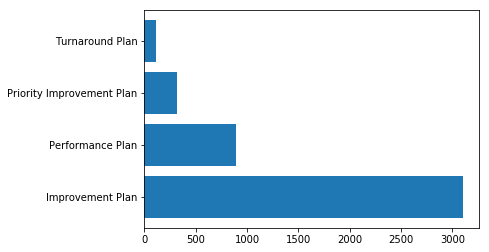

In [9]:
plt.barh(y.unique(), y.value_counts())

# 2. Modeling

In [10]:
# Compare accuracy of models with different hyper-parameters using cross-validation
def gridsearch_model(model_pipeline, model_parameters):
    
    # Create kfolds for CV
    kfold = KFold(n_splits=5, shuffle=False, random_state=123)

    # Instantiate GridSearchCV object
    model = GridSearchCV(model_pipeline, model_parameters, cv=kfold, return_train_score=True)

    # Fit/Predict train/test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=29)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Show results
    print(metrics.classification_report(y_test, y_pred))
    model_results = pd.DataFrame(model.cv_results_)
    print("Accuracy: " + str(round(model.best_score_, 2)))
    return round(model.best_score_, 3)

## Logistic Regression

Tuning `solver`, which is the algorithm used to find the optimal solution.

In [11]:
# Setup pipeline
steps = [('scaler', preprocessing.StandardScaler()),
         ('LogReg', LogisticRegression(class_weight="balanced",random_state=16, max_iter=1000))]
pipeline = Pipeline(steps)

# Specify hyperparameter space
parameters = {'LogReg__solver': ('newton-cg', 'liblinear', 'lbfgs')}

# Generate results for best model 
log_reg_accuracy = gridsearch_model(pipeline, parameters)

                           precision    recall  f1-score   support

         Improvement Plan       0.36      0.19      0.24       359
         Performance Plan       0.82      0.82      0.82      1249
Priority Improvement Plan       0.24      0.35      0.29       118
          Turnaround Plan       0.08      0.30      0.12        44

              avg / total       0.67      0.65      0.65      1770

Accuracy: 0.64


## Random Forest

Tuning `n_estimates`, which is the number of trees.

In [12]:
# Setup pipeline
steps = [('scaler', preprocessing.StandardScaler()),
         ('RF', RandomForestClassifier(random_state=16))]

pipeline = Pipeline(steps)

# Specify hyperparameter space
parameters = {'RF__n_estimators':[50, 100, 200, 250]}

# Generate results for best model 
rf_accuracy = gridsearch_model(pipeline, parameters)

                           precision    recall  f1-score   support

         Improvement Plan       0.41      0.23      0.29       359
         Performance Plan       0.77      0.93      0.84      1249
Priority Improvement Plan       0.34      0.12      0.18       118
          Turnaround Plan       0.22      0.05      0.08        44

              avg / total       0.65      0.71      0.67      1770

Accuracy: 0.71


## Support Vector Machine

Tuning `kernals`, which is used to create the boundaries between predictions.

In [13]:
# Setup pipeline
steps = [('scaler', preprocessing.StandardScaler()),
         ('SVM', SVC(random_state=16))]
pipeline = Pipeline(steps)

# Specify hyperparameter space
parameters = {'SVM__degree':[2,3,4],
              'SVM__kernel':['poly', 'linear','rbf']}

# Generate results for best model 
svm_accuracy = gridsearch_model(pipeline, parameters)

                           precision    recall  f1-score   support

         Improvement Plan       0.45      0.15      0.23       359
         Performance Plan       0.75      0.97      0.84      1249
Priority Improvement Plan       0.44      0.12      0.19       118
          Turnaround Plan       0.00      0.00      0.00        44

              avg / total       0.65      0.72      0.65      1770

Accuracy: 0.72


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Neural Network

Tuning `alpha`, which is the regularization parameter used to penalize for model overfitting, and `hidden_layer_size`, which is the number of nodes in each layer.

In [14]:
# Setup pipeline
steps = [('scaler', preprocessing.StandardScaler()),
         ('MLP', MLPClassifier(random_state=16, max_iter=10000))]
pipeline = Pipeline(steps)

# Specify hyperparameter space
parameters = {'MLP__alpha':[.001,.01,1], 
              'MLP__hidden_layer_sizes':[(36),(18,18)]}

# Generate results for best model 
mlp_accuracy = gridsearch_model(pipeline, parameters)

                           precision    recall  f1-score   support

         Improvement Plan       0.42      0.24      0.30       359
         Performance Plan       0.77      0.94      0.85      1249
Priority Improvement Plan       0.39      0.17      0.24       118
          Turnaround Plan       0.00      0.00      0.00        44

              avg / total       0.66      0.72      0.68      1770

Accuracy: 0.72


# 3. Conclusion

Overall, the neural network model is the most accurate, but it does not predict any Turnaround schools. In fact, no models do well at predicting Turnaround schools. The random forest model performs the best, but only predicts them correctly 22% of the time and falsely reporting them 95% of the time.

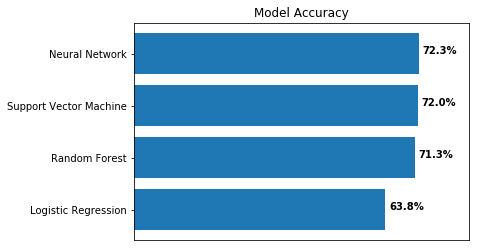

In [15]:
results = pd.DataFrame([["Logistic Regression", log_reg_accuracy], ["Random Forest", rf_accuracy],
              ["Support Vector Machine", svm_accuracy], ["Neural Network", mlp_accuracy]], 
             columns=["Model","Accuracy"])

plt.barh(results["Model"], results["Accuracy"])
for i, v in enumerate(results["Accuracy"]):
    plt.text(v+.01, i, str(round(v*100,1))+"%", fontweight='bold')
plt.xlim(0,.85)
plt.title("Model Accuracy")
plt.xticks([])
plt.show()

---

### Sources:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

- https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/